In [68]:
Hosts=["Mycobacterium"]
paccs=[]
phage_info=open("./data/top_host_phage_info.txt")
for line in phage_info.readlines():
    host=line.split("\t")[0]
    trna_count=line.split("\t")[-3]
    name=line.split("\t")[3]
    if host in Hosts:
        paccs.append(line.split("\t")[2])

In [69]:
import os
from Bio import SeqIO
import subprocess

smegs=[]

for phage in paccs:
    gbk_file="./data/pgenomes/"+phage+".gbk"
    if os.path.exists(gbk_file):
        handle=SeqIO.parse(gbk_file, "genbank")

        for g in handle:
                for feature in g.features:
                    if feature.type=="source":
                        if "host" in feature.qualifiers.keys():
                            hostish=(feature.qualifiers["host"][0])
                        elif "lab_host" in feature.qualifiers.keys():
                            hostish=(feature.qualifiers["lab_host"][0]+"***")
                        elif "isolate" in feature.qualifiers.keys():
                            hostish=(feature.qualifiers["isolate"][0])
                            #print(feature.qualifiers)
                        else:
                            hostish="none"
                            #print("no host specified for "+phage)
                            #print(feature.qualifiers)
        if "155" in hostish:
            smegs.append(phage)
        
print(len(smegs))

217


In [70]:
from tRNA_functions import *

In [26]:
#os.mkdir("./data/pgenomes/MSmeg_phages")
path="./data/pgenomes/MSmeg_phages/"

for i in smegs:

    gbk_file="./data/pgenomes/"+i+".gbk"
    fasta=path+i+".fasta"
    cds_fasta=path+i+".cds.fasta"
    trna=path+i+".trna"
    gbk_to_cds_fasta(gbk_file,cds_fasta)
    gbk_to_fasta(gbk_file, fasta)
    run_trna_scan(fasta, trna)

97 CDS sequences extracted from ./data/pgenomes/JN049605.1.gbk
tRNA scan of ./data/pgenomes/MSmeg_phages/JN049605.1.fasta is done!
86 CDS sequences extracted from ./data/pgenomes/JN408459.1.gbk
tRNA scan of ./data/pgenomes/MSmeg_phages/JN408459.1.fasta is done!
143 CDS sequences extracted from ./data/pgenomes/JN391441.1.gbk
tRNA scan of ./data/pgenomes/MSmeg_phages/JN391441.1.fasta is done!
86 CDS sequences extracted from ./data/pgenomes/JX307702.1.gbk
tRNA scan of ./data/pgenomes/MSmeg_phages/JX307702.1.fasta is done!
91 CDS sequences extracted from ./data/pgenomes/KF841476.1.gbk
tRNA scan of ./data/pgenomes/MSmeg_phages/KF841476.1.fasta is done!
101 CDS sequences extracted from ./data/pgenomes/KM408320.1.gbk
tRNA scan of ./data/pgenomes/MSmeg_phages/KM408320.1.fasta is done!
89 CDS sequences extracted from ./data/pgenomes/KM101119.1.gbk
tRNA scan of ./data/pgenomes/MSmeg_phages/KM101119.1.fasta is done!
83 CDS sequences extracted from ./data/pgenomes/JX307705.1.gbk
tRNA scan of ./dat

In [27]:
for i in smegs:
    cdsfasta="./data/pgenomes/MSmeg_phages/"+i+".cds.fasta"
    run_codonM(cdsfasta, "./data/pgenomes/MSmeg_phages/"+i+".m")
    run_codonW(cdsfasta, "./data/pgenomes/MSmeg_phages/"+i+".w")
    extract_cds_annotations("./data/pgenomes/"+i+".gbk","./data/pgenomes/MSmeg_phages/"+i+".cds.annotations.txt")

97 annotated features in ./data/pgenomes/JN049605.1.gbk
86 annotated features in ./data/pgenomes/JN408459.1.gbk
143 annotated features in ./data/pgenomes/JN391441.1.gbk
86 annotated features in ./data/pgenomes/JX307702.1.gbk
91 annotated features in ./data/pgenomes/KF841476.1.gbk
101 annotated features in ./data/pgenomes/KM408320.1.gbk
89 annotated features in ./data/pgenomes/KM101119.1.gbk
83 annotated features in ./data/pgenomes/JX307705.1.gbk
87 annotated features in ./data/pgenomes/JN243856.1.gbk
88 annotated features in ./data/pgenomes/KP027198.1.gbk
145 annotated features in ./data/pgenomes/JN412590.1.gbk
110 annotated features in ./data/pgenomes/JQ300538.1.gbk
95 annotated features in ./data/pgenomes/JF704104.1.gbk
103 annotated features in ./data/pgenomes/JF937098.1.gbk
102 annotated features in ./data/pgenomes/KM363597.1.gbk
106 annotated features in ./data/pgenomes/KR824843.1.gbk
92 annotated features in ./data/pgenomes/JN020140.1.gbk
137 annotated features in ./data/pgenomes

In [71]:
%load_ext rpy2.ipython
%R library(dplyr); library(magrittr); library(ggplot2); library(reshape)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


<StrVector - Python:0x104ba63f8 / R:0x10eb28cb0>
[str, str, str, ..., str, str, str]

In [72]:
%%R
##Functions:

source("./scripts/phage_host_tai.R")

In [73]:
%%R -i smegs
###Look through tRNA content and select phages with unique tRNA profiles

phagelist<-smegs

codons<-read.table("./data/codon_list.txt", header=FALSE)
colnames(codons)[2]<-"V6"

codonlist<-read.table("./data/svm1/Msmeg155.trna", skip=3, sep="\t")%>%.$V6%>%unique
print(codonlist)

 [1] ATC GCA CTG TAC ACC ATG TGG GCC CAG GAG GTG CTC GGA AGA CAC AAG CGG CAA AGG
[20] AAA ACA CCG TCC TCA AGC CGT TCG ACG GAA GAC TTC GCG TTA CTA CCA AAC GTA TGC
[39] CCC TTG GGC GTC TGA GGG
44 Levels: AAA AAC AAG ACA ACC ACG AGA AGC AGG ATC ATG CAA CAC CAG CCA ... TTG


In [84]:
%%R 
tRNA_file="./data/svm1/Msmeg155.trna"

mpt<-data.frame(tai=numeric(), title=character(), genome=factor(), tRNA_count=numeric())

for (i in smegs){
    codonm<-paste("./data/pgenomes/MSmeg_phages/",i,".m", sep="")
    codonw<-paste("./data/pgenomes/MSmeg_phages/",i,".w", sep="")%>%read.table(sep="\t", header=TRUE, na.strings="*****")
    codonw$title<-gsub(" ","", codonw$title)
    phage_tRNA_file<-paste("./data/pgenomes/MSmeg_phages/",i,".trna",sep="")
    if (file.info(phage_tRNA_file)$size>0){
        num_tRNA<-read.table(phage_tRNA_file, skip=3)%>%nrow
    }   else {num_tRNA<-0}
    
    tais<-calculate_tai(tRNA_file, codonm)%>%data.frame
    colnames(tais)<-"tai"
    tais<-cbind.data.frame(tais, codonw$title)
    tais$genome<-i
    tais$tRNA_count<-num_tRNA
    mpt<-rbind.data.frame(mpt, tais)
    }


[1] "scanning codonM file"
Read 5917 items
[1] "scanning codonM file"
Read 5246 items
[1] "scanning codonM file"
Read 8723 items
[1] "scanning codonM file"
Read 5246 items
[1] "scanning codonM file"
Read 5551 items
[1] "scanning codonM file"
Read 6161 items
[1] "scanning codonM file"
Read 5429 items
[1] "scanning codonM file"
Read 5063 items
[1] "scanning codonM file"
Read 5307 items
[1] "scanning codonM file"
Read 5368 items
[1] "scanning codonM file"
Read 8845 items
[1] "scanning codonM file"
Read 6710 items
[1] "scanning codonM file"
Read 5795 items
[1] "scanning codonM file"
Read 6283 items
[1] "scanning codonM file"
Read 6222 items
[1] "scanning codonM file"
Read 6466 items
[1] "scanning codonM file"
Read 5612 items
[1] "scanning codonM file"
Read 8357 items
[1] "scanning codonM file"
Read 9333 items
[1] "scanning codonM file"
Read 6405 items
[1] "scanning codonM file"
Read 14091 items
[1] "scanning codonM file"
Read 5734 items
[1] "scanning codonM file"
Read 13969 items
[1] "scan

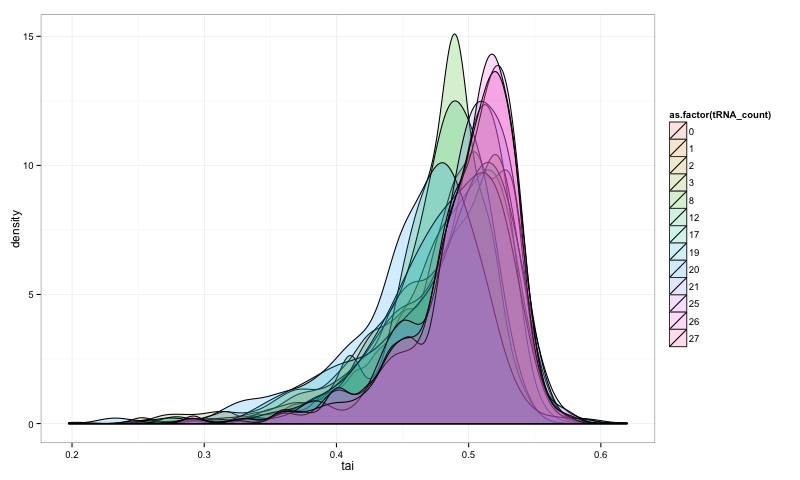

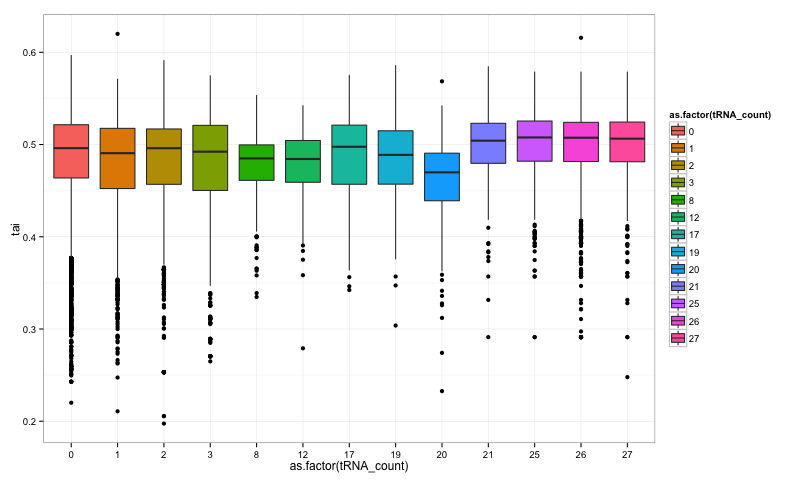

In [85]:
%%R -w 800
ggplot(mpt, aes(tai, fill=as.factor(tRNA_count)))+geom_density(alpha=0.2)+theme_bw()->plot1
plot(plot1)

ggplot(mpt, aes(as.factor(tRNA_count), tai, fill=as.factor(tRNA_count)))+geom_boxplot()+theme_bw()->plot2
plot(plot2)

>So looks like no difference between phages with and without tRNAs for their tRNA adaptation indices 

>What if i include phage tRNAs in the pool?

In [79]:
%%R 
tRNA_file="./data/svm1/Msmeg155.trna"

mpt<-data.frame(tai=numeric(), title=character(), genome=factor(), tRNA_count=numeric())

for (i in smegs){
    codonm<-paste("./data/pgenomes/MSmeg_phages/",i,".m", sep="")
    codonw<-paste("./data/pgenomes/MSmeg_phages/",i,".w", sep="")%>%read.table(sep="\t", header=TRUE, na.strings="*****")
    codonw$title<-gsub(" ","", codonw$title)
    phage_tRNA_file<-paste("./data/pgenomes/MSmeg_phages/",i,".trna",sep="")
    if (file.info(phage_tRNA_file)$size>0){
        num_tRNA<-read.table(phage_tRNA_file, skip=3)%>%nrow
        tais<-calculate_ph_tai(htrna=tRNA_file, ptrna=phage_tRNA_file, codonm)%>%data.frame    
    }   else {num_tRNA<-0
        tais<-calculate_tai(tRNA_file, codonm)%>%data.frame
    }
    colnames(tais)<-"tai"
    tais<-cbind.data.frame(tais, codonw$title)
    tais$genome<-i
    tais$tRNA_count<-num_tRNA
    mpt<-rbind.data.frame(mpt, tais)
    }

[1] "scanning codonM file"
Read 5917 items
[1] "scanning codonM file"
Read 5246 items
[1] "scanning codonM file"
Read 8723 items
[1] "scanning codonM file"
Read 5246 items
[1] "scanning codonM file"
Read 5551 items
[1] "scanning codonM file"
Read 6161 items
[1] "scanning codonM file"
Read 5429 items
[1] "scanning codonM file"
Read 5063 items
[1] "scanning codonM file"
Read 5307 items
[1] "scanning codonM file"
Read 5368 items
[1] "scanning codonM file"
Read 8845 items
[1] "scanning codonM file"
Read 6710 items
[1] "scanning codonM file"
Read 5795 items
[1] "scanning codonM file"
Read 6283 items
[1] "scanning codonM file"
Read 6222 items
[1] "scanning codonM file"
Read 6466 items
[1] "scanning codonM file"
Read 5612 items
[1] "scanning codonM file"
Read 8357 items
[1] "scanning codonM file"
Read 9333 items
[1] "scanning codonM file"
Read 6405 items
[1] "scanning codonM file"
Read 14091 items
[1] "scanning codonM file"
Read 5734 items
[1] "scanning codonM file"
Read 13969 items
[1] "scan

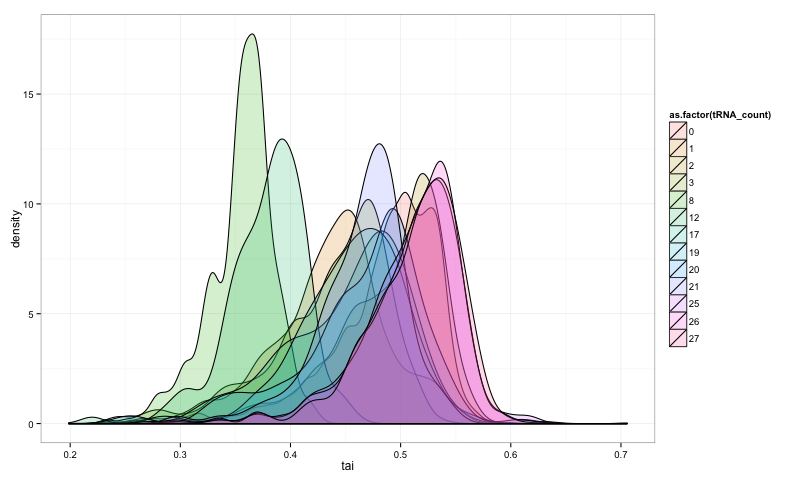

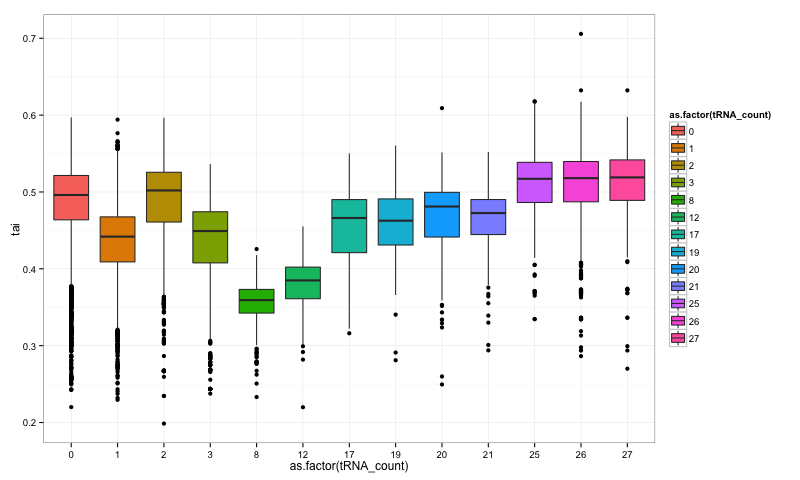

In [80]:
%%R -w 800
ggplot(mpt, aes(tai, fill=as.factor(tRNA_count)))+geom_density(alpha=0.2)+theme_bw()->plot1
plot(plot1)

ggplot(mpt, aes(as.factor(tRNA_count), tai, fill=as.factor(tRNA_count)))+geom_boxplot()+theme_bw()->plot2
plot(plot2)

>Still nothing obvious.  For some reason, the intermediate tRNA numbers have a lower tAI than than high-tRNA containing and low tRNA-containing phages.

In [ ]:
%%R 
tRNA_file="./data/svm1/Msmeg155.trna"

mpt<-data.frame(tai=numeric(), title=character(), genome=factor(), tRNA_count=numeric())

for (i in smegs){
    codonm<-paste("./data/pgenomes/MSmeg_phages/",i,".m", sep="")
    codonw<-paste("./data/pgenomes/MSmeg_phages/",i,".w", sep="")%>%read.table(sep="\t", header=TRUE, na.strings="*****")
    codonw$title<-gsub(" ","", codonw$title)
    phage_tRNA_file<-paste("./data/pgenomes/MSmeg_phages/",i,".trna",sep="")
    if (file.info(phage_tRNA_file)$size>0){
        num_tRNA<-read.table(phage_tRNA_file, skip=3)%>%nrow
        tais<-calculate_ph_tai(htrna=tRNA_file, ptrna=phage_tRNA_file, codonm)%>%data.frame
        htrnas<-read.table(tRNA_file, sep="\t", skip=3, header=FALSE)%>%group_by(V6)%>%summarise(count=n())
        ptrnas<-read.table(phage_tRNA_file, sep="\t", skip=3, header=FALSE)%>%group_by(V6)%>%summarise(count=n())
        
        
        
    }else {num_tRNA<-0
       tais<-calculate_tai(tRNA_file, codonm)%>%data.frame
    }
    colnames(tais)<-"tai"
    tais<-cbind.data.frame(tais, codonw$title)
    tais$genome<-i
    tais$tRNA_count<-num_tRNA
    mpt<-rbind.data.frame(mpt, tais)
    }

In [76]:
%%R 
tRNA_file="./data/svm1/Msmeg155.trna"

mpt<-data.frame(tai=numeric(), title=character(), Nc=numeric(),GC3s=numeric(),GC=numeric(),L_aa=numeric(),genome=factor(), tRNA_count=numeric(), unique_tRNA=factor())

for (i in smegs){
    codonm<-paste("./data/pgenomes/MSmeg_phages/",i,".m", sep="")
    codonw<-paste("./data/pgenomes/MSmeg_phages/",i,".w", sep="")%>%read.table(sep="\t", header=TRUE, na.strings="*****")
    codonw$title<-gsub(" ","", codonw$title)
    phage_tRNA_file<-paste("./data/pgenomes/MSmeg_phages/",i,".trna",sep="")
    if (file.info(phage_tRNA_file)$size>0){
        num_tRNA<-read.table(phage_tRNA_file, skip=3)%>%nrow
        tais<-calculate_ph_tai(htrna=tRNA_file, ptrna=phage_tRNA_file, codonm)%>%data.frame
        htrnas<-read.table(tRNA_file, sep="\t", skip=3, header=FALSE)%>%group_by(V6)%>%summarise(count=n())
        colnames(htrnas)[2]<-"host_count"
        ptrnas<-read.table(phage_tRNA_file, sep="\t", skip=3, header=FALSE)%>%group_by(V6)%>%summarise(count=n())
        
        ptrnas$V6[(ptrnas$V6 %in% htrnas$V6)==FALSE]%>%length->unique_tRNA
        ptrnas$V6[(ptrnas$V6 %in% htrnas$V6)==FALSE]%>%print
        #together<-merge(ptrnas, htrnas, by="V6", all.x=TRUE, all.y=TRUE)
        #head(together)%>%print
        }
    else {num_tRNA<-0
          unique_tRNA<-"none"
       tais<-calculate_tai(tRNA_file, codonm)%>%data.frame
    }
    colnames(tais)<-"tai"
    tais<-cbind.data.frame(tais, codonw[,1:5])
    tais$genome<-i
    tais$tRNA_count<-num_tRNA
    tais$unique_tRNA<-unique_tRNA
    mpt<-rbind.data.frame(mpt, tais)
    }    

[1] "scanning codonM file"
Read 5917 items
factor(0)
Levels: AAC CAG TGG
[1] "scanning codonM file"
Read 5246 items
factor(0)
Levels: TGG
[1] "scanning codonM file"
Read 8723 items
factor(0)
Levels: CAA GGA
[1] "scanning codonM file"
Read 5246 items
[1] "scanning codonM file"
Read 5551 items
[1] "scanning codonM file"
Read 6161 items
[1] "scanning codonM file"
Read 5429 items
factor(0)
Levels: AAC CTG TGG
[1] "scanning codonM file"
Read 5063 items
[1] "scanning codonM file"
Read 5307 items
[1] "scanning codonM file"
Read 5368 items
[1] "scanning codonM file"
Read 8845 items
factor(0)
Levels: CAA GGA
[1] "scanning codonM file"
Read 6710 items
[1] "scanning codonM file"
Read 5795 items
[1] "scanning codonM file"
Read 6283 items
[1] "scanning codonM file"
Read 6222 items
[1] "scanning codonM file"
Read 6466 items
[1] "scanning codonM file"
Read 5612 items
[1] "scanning codonM file"
Read 8357 items
factor(0)
Levels: AAA AAG ACG CAC CTA TGC TGG TTG
[1] "scanning codonM file"
Read 9333 items

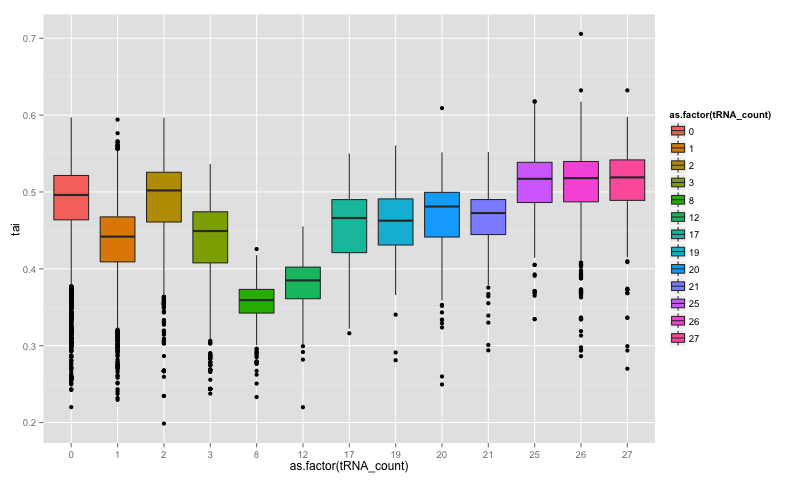

In [78]:
%%R -w 800
ggplot(mpt, aes(as.factor(tRNA_count),tai, fill=as.factor(tRNA_count)))+geom_boxplot()

>OK, so tAI and phage tRNA content appear to have nothing to do with each other from this point of view.

>ptcs, rather than tAI, may however be able to pull out genes that are selected for.  Genome wide patterns within the phage do not appear (based on this metric), but gene level patterns might

>problem with ptcs is of course that it is calculated based on the phage tRNA pool only.  I need to figure out a way to compare this number to non-tRNA-containing phages.